In [1]:
# import sensitive information from config file
from config import db_user
from config import db_password
from config import db_name
from config import db_port
from sqlalchemy import create_engine

# connect postgresql database
db_connect = "postgresql://" + db_user + ":" + db_password + "@localhost:" + db_port + "/" + db_name
engine = create_engine(db_connect)
connection = engine.connect()


In [25]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# create df from sql salary table
salary_df = pandas.read_sql_table("salaries", connection)
salary_df


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


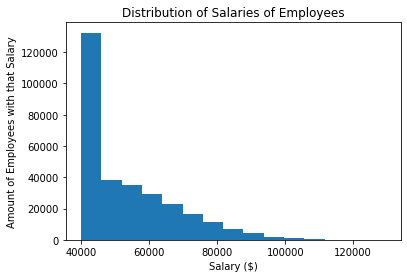

In [41]:
# create histogram to show distribution of salaries of employees
plt.hist(salary_df["salary"], bins=15)
plt.xlabel('Salary ($)')
plt.ylabel('Amount of Employees with that Salary')
plt.title('Distribution of Salaries of Employees')
plt.savefig("figures/salary_histogram.png")
plt.show()


In [22]:
# create df from sql titles table
title_df = pandas.read_sql_table("titles", connection)
title_df


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [23]:
# create df from sql employees table
employees_df = pandas.read_sql_table("employees", connection)
employees_df


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,2054-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,2058-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,2052-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,2058-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,2055-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,2059-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,2059-09-22,Percy,Samarati,F,1994-09-08


In [29]:
# merge salary and employees table together
merge2_df = pd.merge(salary_df, employees_df, on="emp_no")
merge2_df


,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,2053-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,2064-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,2059-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,2054-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,2055-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,2058-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,2053-03-07,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,2061-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,2056-09-05,Patricia,Breugel,M,1993-10-13


In [30]:
# groupby employee title id and find the means
average_df = merge2_df.groupby(["emp_title_id"]).mean()
average_df


,emp_no,salary
emp_title_id,,
e0001,252992.595373,48564.434447
e0002,253654.345919,48535.336511
e0003,253038.749885,48506.799871
e0004,251811.432730,48582.896092
m0001,110780.833333,51531.041667
s0001,253408.503604,58465.382850
s0002,254481.798969,58550.172704


In [32]:
# reset index so employee title id is a column
average_df = average_df.reset_index()
average_df


,emp_title_id,emp_no,salary
0,e0001,252992.595373,48564.434447
1,e0002,253654.345919,48535.336511
2,e0003,253038.749885,48506.799871
3,e0004,251811.432730,48582.896092
4,m0001,110780.833333,51531.041667
5,s0001,253408.503604,58465.382850
6,s0002,254481.798969,58550.172704


In [33]:
# merge table from last cell with title df
merge3_df = pd.merge(average_df, title_df, left_on="emp_title_id", right_on="title_id")
merge3_df


,emp_title_id,emp_no,salary,title_id,title
0,e0001,252992.595373,48564.434447,e0001,Assistant Engineer
1,e0002,253654.345919,48535.336511,e0002,Engineer
2,e0003,253038.749885,48506.799871,e0003,Senior Engineer
3,e0004,251811.432730,48582.896092,e0004,Technique Leader
4,m0001,110780.833333,51531.041667,m0001,Manager
5,s0001,253408.503604,58465.382850,s0001,Staff
6,s0002,254481.798969,58550.172704,s0002,Senior Staff


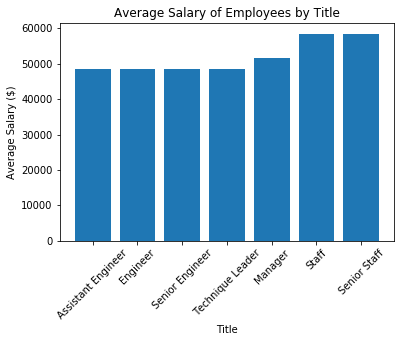

In [42]:
# create bar chart of average salaries of employees by title
plt.bar(merge3_df["title"], merge3_df["salary"])
plt.xticks(rotation=45)
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary of Employees by Title')
plt.savefig("figures/salary_by_title.png")
plt.show()


In [44]:
# disconnect connection of database from postgresql
connection.close()